In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
import re
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexkroeker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = []
for file in range(14):
    data.append(open('Tweet-Data/Device_Shadow_tweets-'+str(2007+file)+'.jl'))

In [4]:
doc = []
for file in data:
    for line in file:
        doc.append(json.loads(line))

In [5]:
len(doc)

14

In [6]:
emptyList = []
for dict in doc:
    emptyList.append(dict['response'])
    

In [7]:
len(emptyList)

14

In [8]:
def check(dictionary):
    if dictionary['result_count'] == 0: return False
    else: return True

In [9]:
emptyData = []
for dict in emptyList:
    if check(dict['meta']): emptyData.append(dict['data'])

In [10]:
len(emptyData)


11

In [11]:
pd.DataFrame(emptyData[2])

,possibly_sensitive,id,text,entities,author_id,lang,public_metrics,reply_settings,source,created_at,conversation_id,in_reply_to_user_id,referenced_tweets
0,False,217375645762715648,Running Cyanogen Mod 7.2 nightly on my DroidX ...,"{'annotations': [{'start': 8, 'end': 23, 'prob...",21411907,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,erased40502,2012-06-25T21:56:07.000Z,217375645762715648,NaN,NaN
1,False,215334029237563393,"@BlackArmsRuler *Arriving at the device, Shado...","{'mentions': [{'start': 0, 'end': 15, 'usernam...",545671532,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,TweetDeck,2012-06-20T06:43:27.000Z,215332668055883776,376628650,"[{'type': 'replied_to', 'id': '215332668055883..."
2,False,204704653403881475,The best game on my galaxy device?shadow gun.,NaN,495225474,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,Twitter for Android,2012-05-21T22:46:07.000Z,204704653403881475,NaN,NaN
3,False,185486060573310976,@bradysewall it's here: http://t.co/nZ7DDAmp,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",61378986,en,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",everyone,TweetDeck,2012-03-29T21:58:17.000Z,185467580549574657,22956770,"[{'type': 'replied_to', 'id': '185467580549574..."
4,False,184820871142182914,Free Kindle e-Book (Also read on your computer...,"{'annotations': [{'start': 5, 'end': 10, 'prob...",326715483,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,Hootsuite,2012-03-28T01:55:04.000Z,184820871142182914,NaN,NaN
5,False,179657807342206977,"Shadow, lo último de Adobe para sincronización...","{'annotations': [{'start': 21, 'end': 25, 'pro...",130654087,es,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,Facebook,2012-03-13T19:58:53.000Z,179657807342206977,NaN,NaN


In [12]:
df = pd.DataFrame(emptyData[0])

In [13]:
for obj in range(1,len(emptyData)):
    df = df.append(pd.DataFrame(emptyData[obj]))

In [14]:
df.shape

(963, 16)

In [15]:
df_clean = df

In [16]:
df_clean.to_pickle("../dummy.pkl4")

In [17]:
df_clean = pd.read_pickle("../dummy.pkl4")

In [18]:
df_clean = df_clean[['lang','author_id','source','text', 'created_at']]

In [19]:
def isRT(text):
        if text.startswith("RT"): return "True"
        else: return "False"

In [20]:
df_clean['is_RT'] = df_clean['text'].map(isRT)

In [21]:
df_clean = df_clean[df_clean['is_RT']=="False"]

In [22]:
df_clean.shape

(518, 6)

In [23]:
import seaborn as sns

/Users/alexkroeker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang', ylabel='count'>

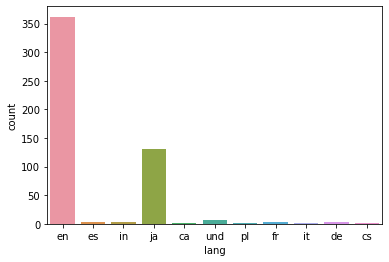

In [24]:
sns.countplot(df_clean['lang'])

In [25]:
df_lang = df_clean.copy()
df_lang = df_lang.groupby('lang').agg({'lang':'count'})
df_lang

,lang
lang,
ca,2
cs,1
de,3
en,362
es,3
fr,4
in,3
it,2
ja,130


In [26]:
df_clean = df_clean[(df_clean['lang'] == "en")]

In [27]:
df_clean = df_clean.drop(['is_RT'], axis=1)

In [28]:
df_clean.nunique()

lang            1
author_id     300
source         58
text          349
created_at    357
dtype: int64

In [29]:
def createdAt(date):
    return date.split('-')[:1][0]
    

In [30]:
df_clean['year'] = df_clean.created_at.map(createdAt)
df_clean.head(20)

,lang,author_id,source,text,created_at,year
0,en,138193673,LinksAlpha,News Everybody! Sonic Riders Zero Gravity – Gi...,2010-11-17T07:50:43.000Z,2010
1,en,71083040,Twitter for BlackBerry®,Dj Breakdance comienza su set con Hybrid Devic...,2010-10-01T04:43:56.000Z,2010
2,en,57454803,Twitter Web Client,@pat_wilson @repi instead of relying on the la...,2010-08-17T21:37:49.000Z,2010
0,en,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011-11-26T22:02:45.000Z,2011
1,en,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011-11-21T01:02:24.000Z,2011
2,en,19329230,Twitter for Android,If you have a tegra 2 device..Shadow gun goes ...,2011-11-18T02:58:56.000Z,2011
3,en,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011-11-12T17:01:54.000Z,2011
4,en,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011-11-06T17:31:29.000Z,2011
5,en,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011-11-04T10:31:16.000Z,2011
6,en,37906490,Twitter for Mac,@mattgemmell Yeah. With all the captors and ca...,2011-10-20T14:32:26.000Z,2011


In [31]:
df_clean = df_clean.drop(columns=['created_at', 'lang'], axis=1)

In [32]:
df_clean['hashtag'] = df_clean['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_clean

,author_id,source,text,year,hashtag
0,138193673,LinksAlpha,News Everybody! Sonic Riders Zero Gravity – Gi...,2010,[]
1,71083040,Twitter for BlackBerry®,Dj Breakdance comienza su set con Hybrid Devic...,2010,"[ninjanight, nochedetriphop]"
2,57454803,Twitter Web Client,@pat_wilson @repi instead of relying on the la...,2010,[]
0,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011,[]
1,81003710,Marci,Now playing Core Device - Shadow On The Wall (...,2011,[]
...,...,...,...,...,...
186,16309969,dlvr.it,Cloud Home Automation Series Part 2 : Use AWS ...,2020,[]
187,10409622,@thedextazlab,Cloud Home Automation Series Part 2 : Use AWS ...,2020,[]
188,4639018735,py-feedr-M157q,Cloud Home Automation Series Part 2 : Use AWS ...,2020,[]
189,192928747,Twitter for Android,@kibblesmith Stacker Pentecost\nAnatema Device...,2020,[]


In [33]:
df_clean.to_pickle('../data_clean_en_year4.plk') 

In [34]:
text = df_clean['text']

In [35]:
text = text.tolist()

In [36]:
for i,v in enumerate(text):
    text[i] = p.clean(v)

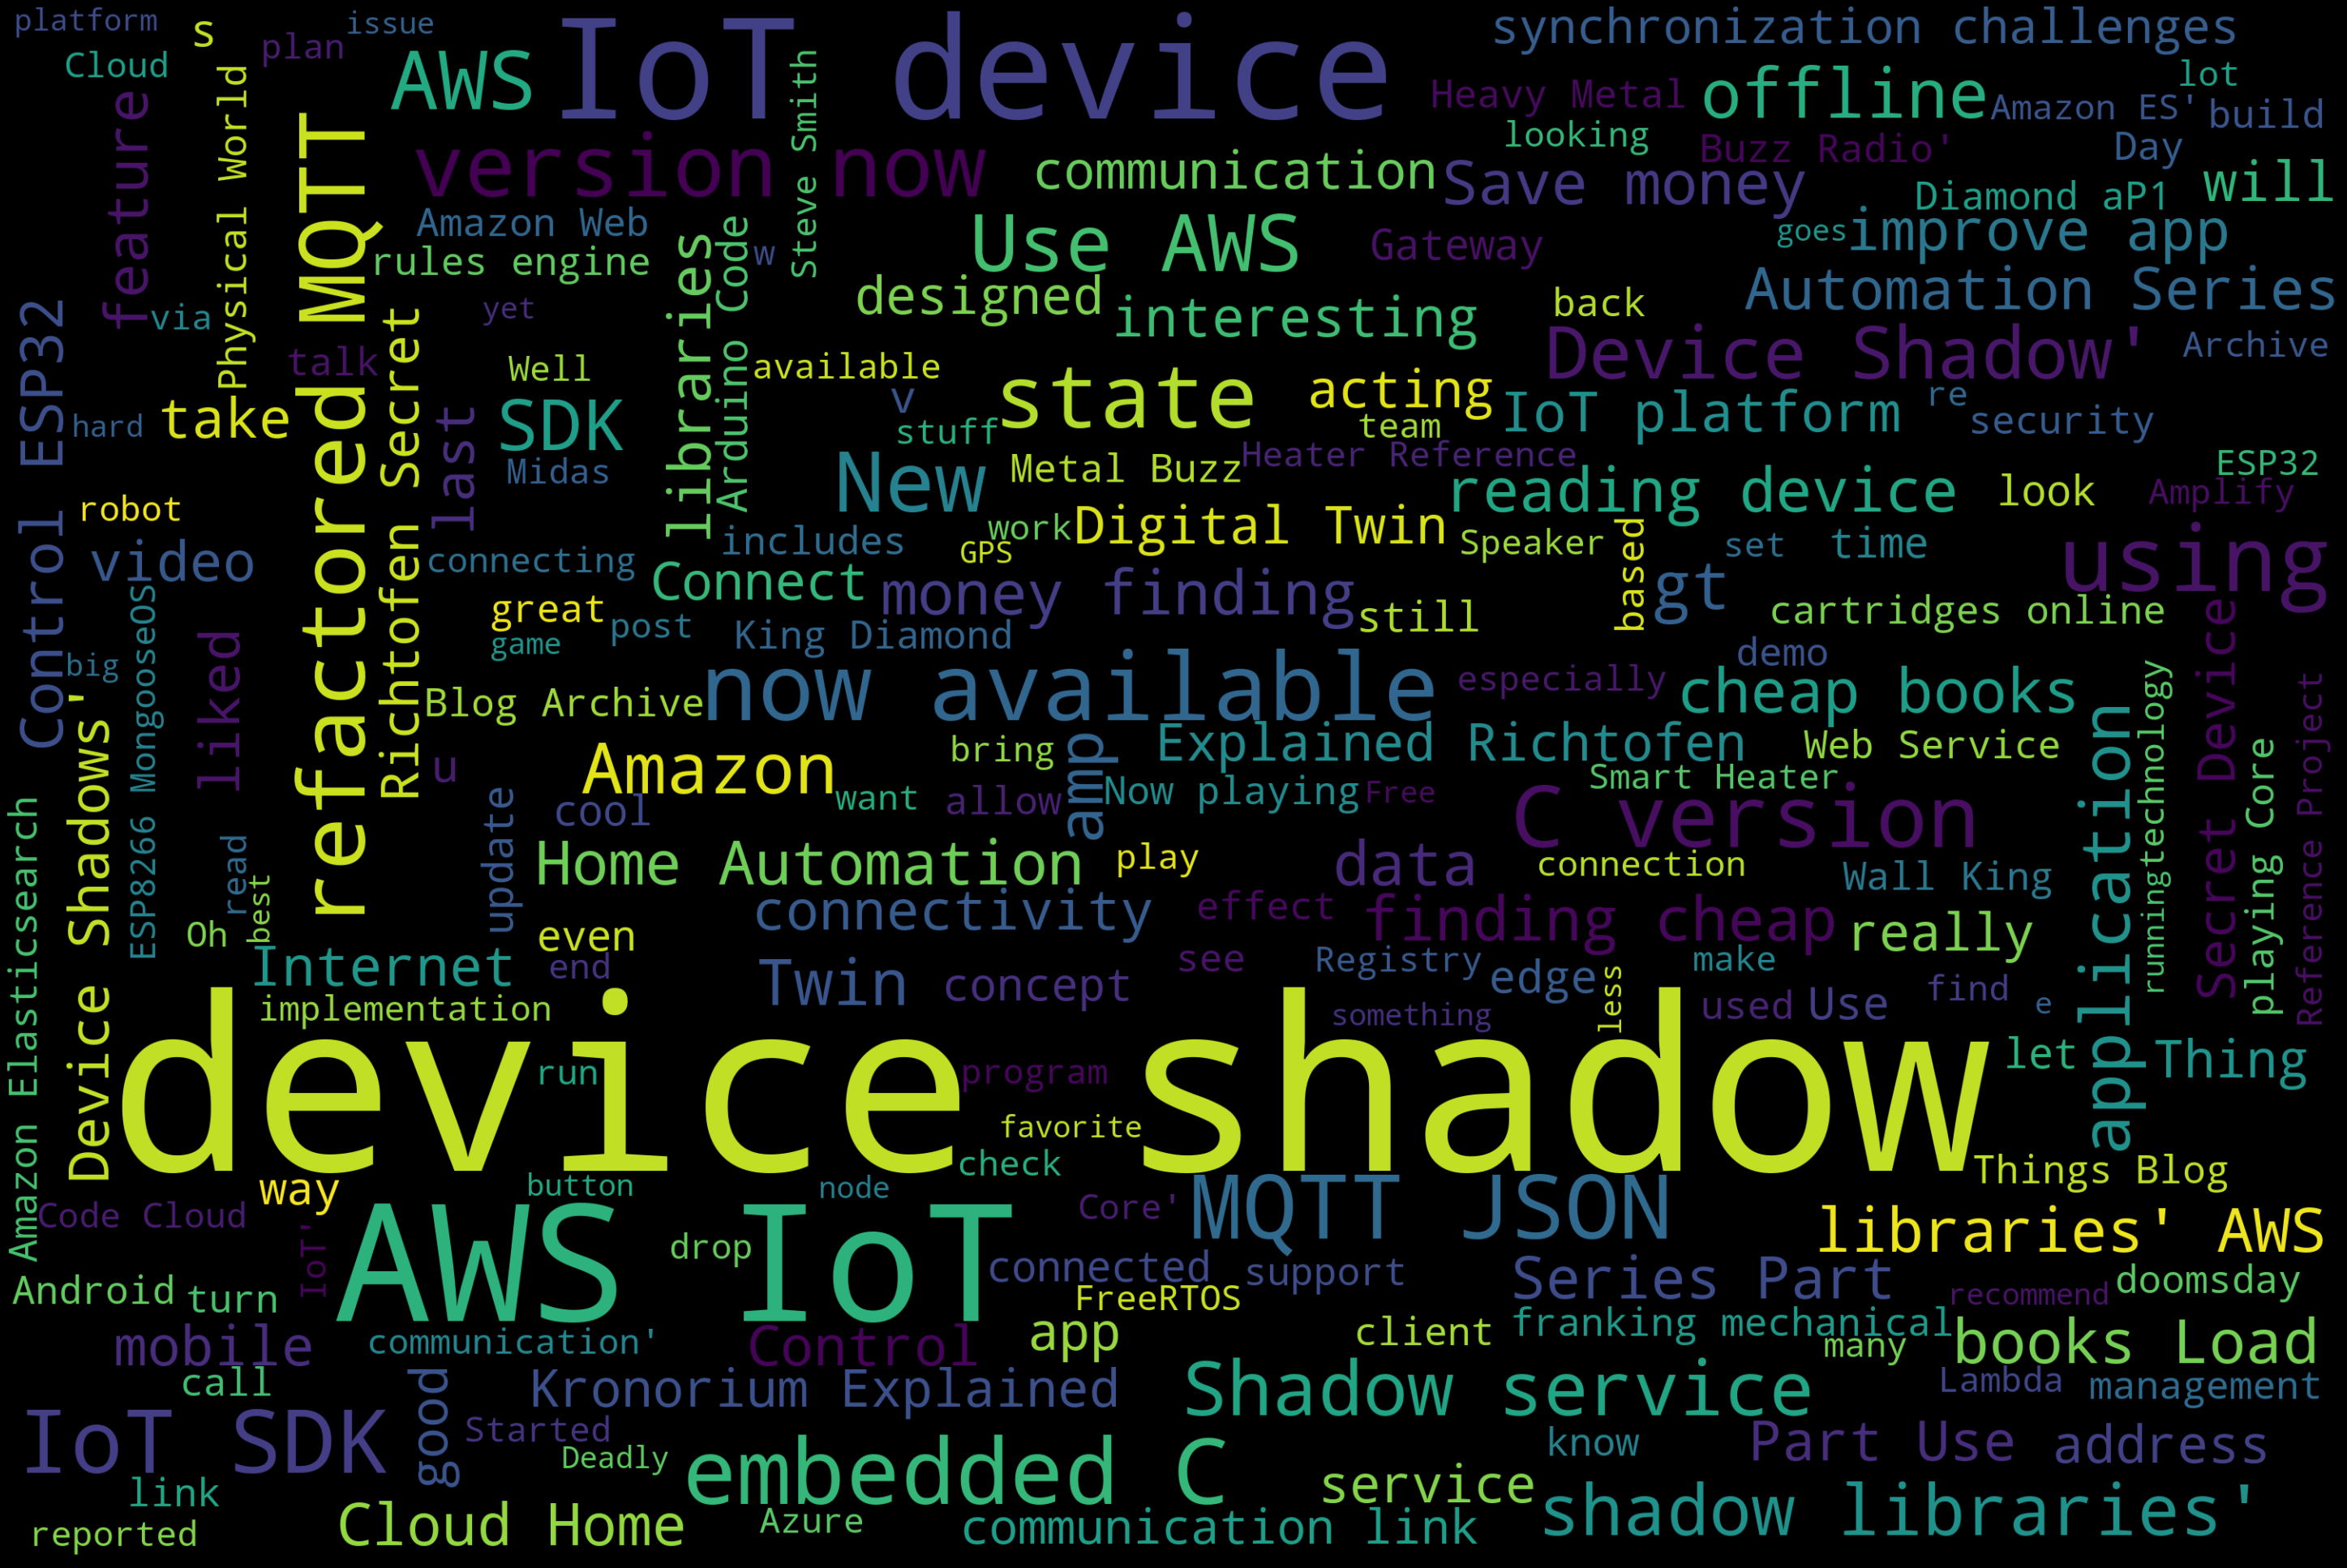

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
pd.DataFrame(text).to_pickle("../text_preprocessing4")

In [39]:
def txt_cleaner(text):
    
    text = text.encode(encoding="ascii", errors="ignore")
    text = text.decode() # removing unicode from the text 
    
    text = p.clean(text)
    
    text = text.lower() #lowering all the text
    
    punct = set(string.punctuation)
    text = "".join([ch for ch in text if ch not in punct]) #remove punctation
    
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
    # try out stemming and lemmatization
    return text

In [40]:
df_clean['text'] = df_clean.text.map(txt_cleaner)

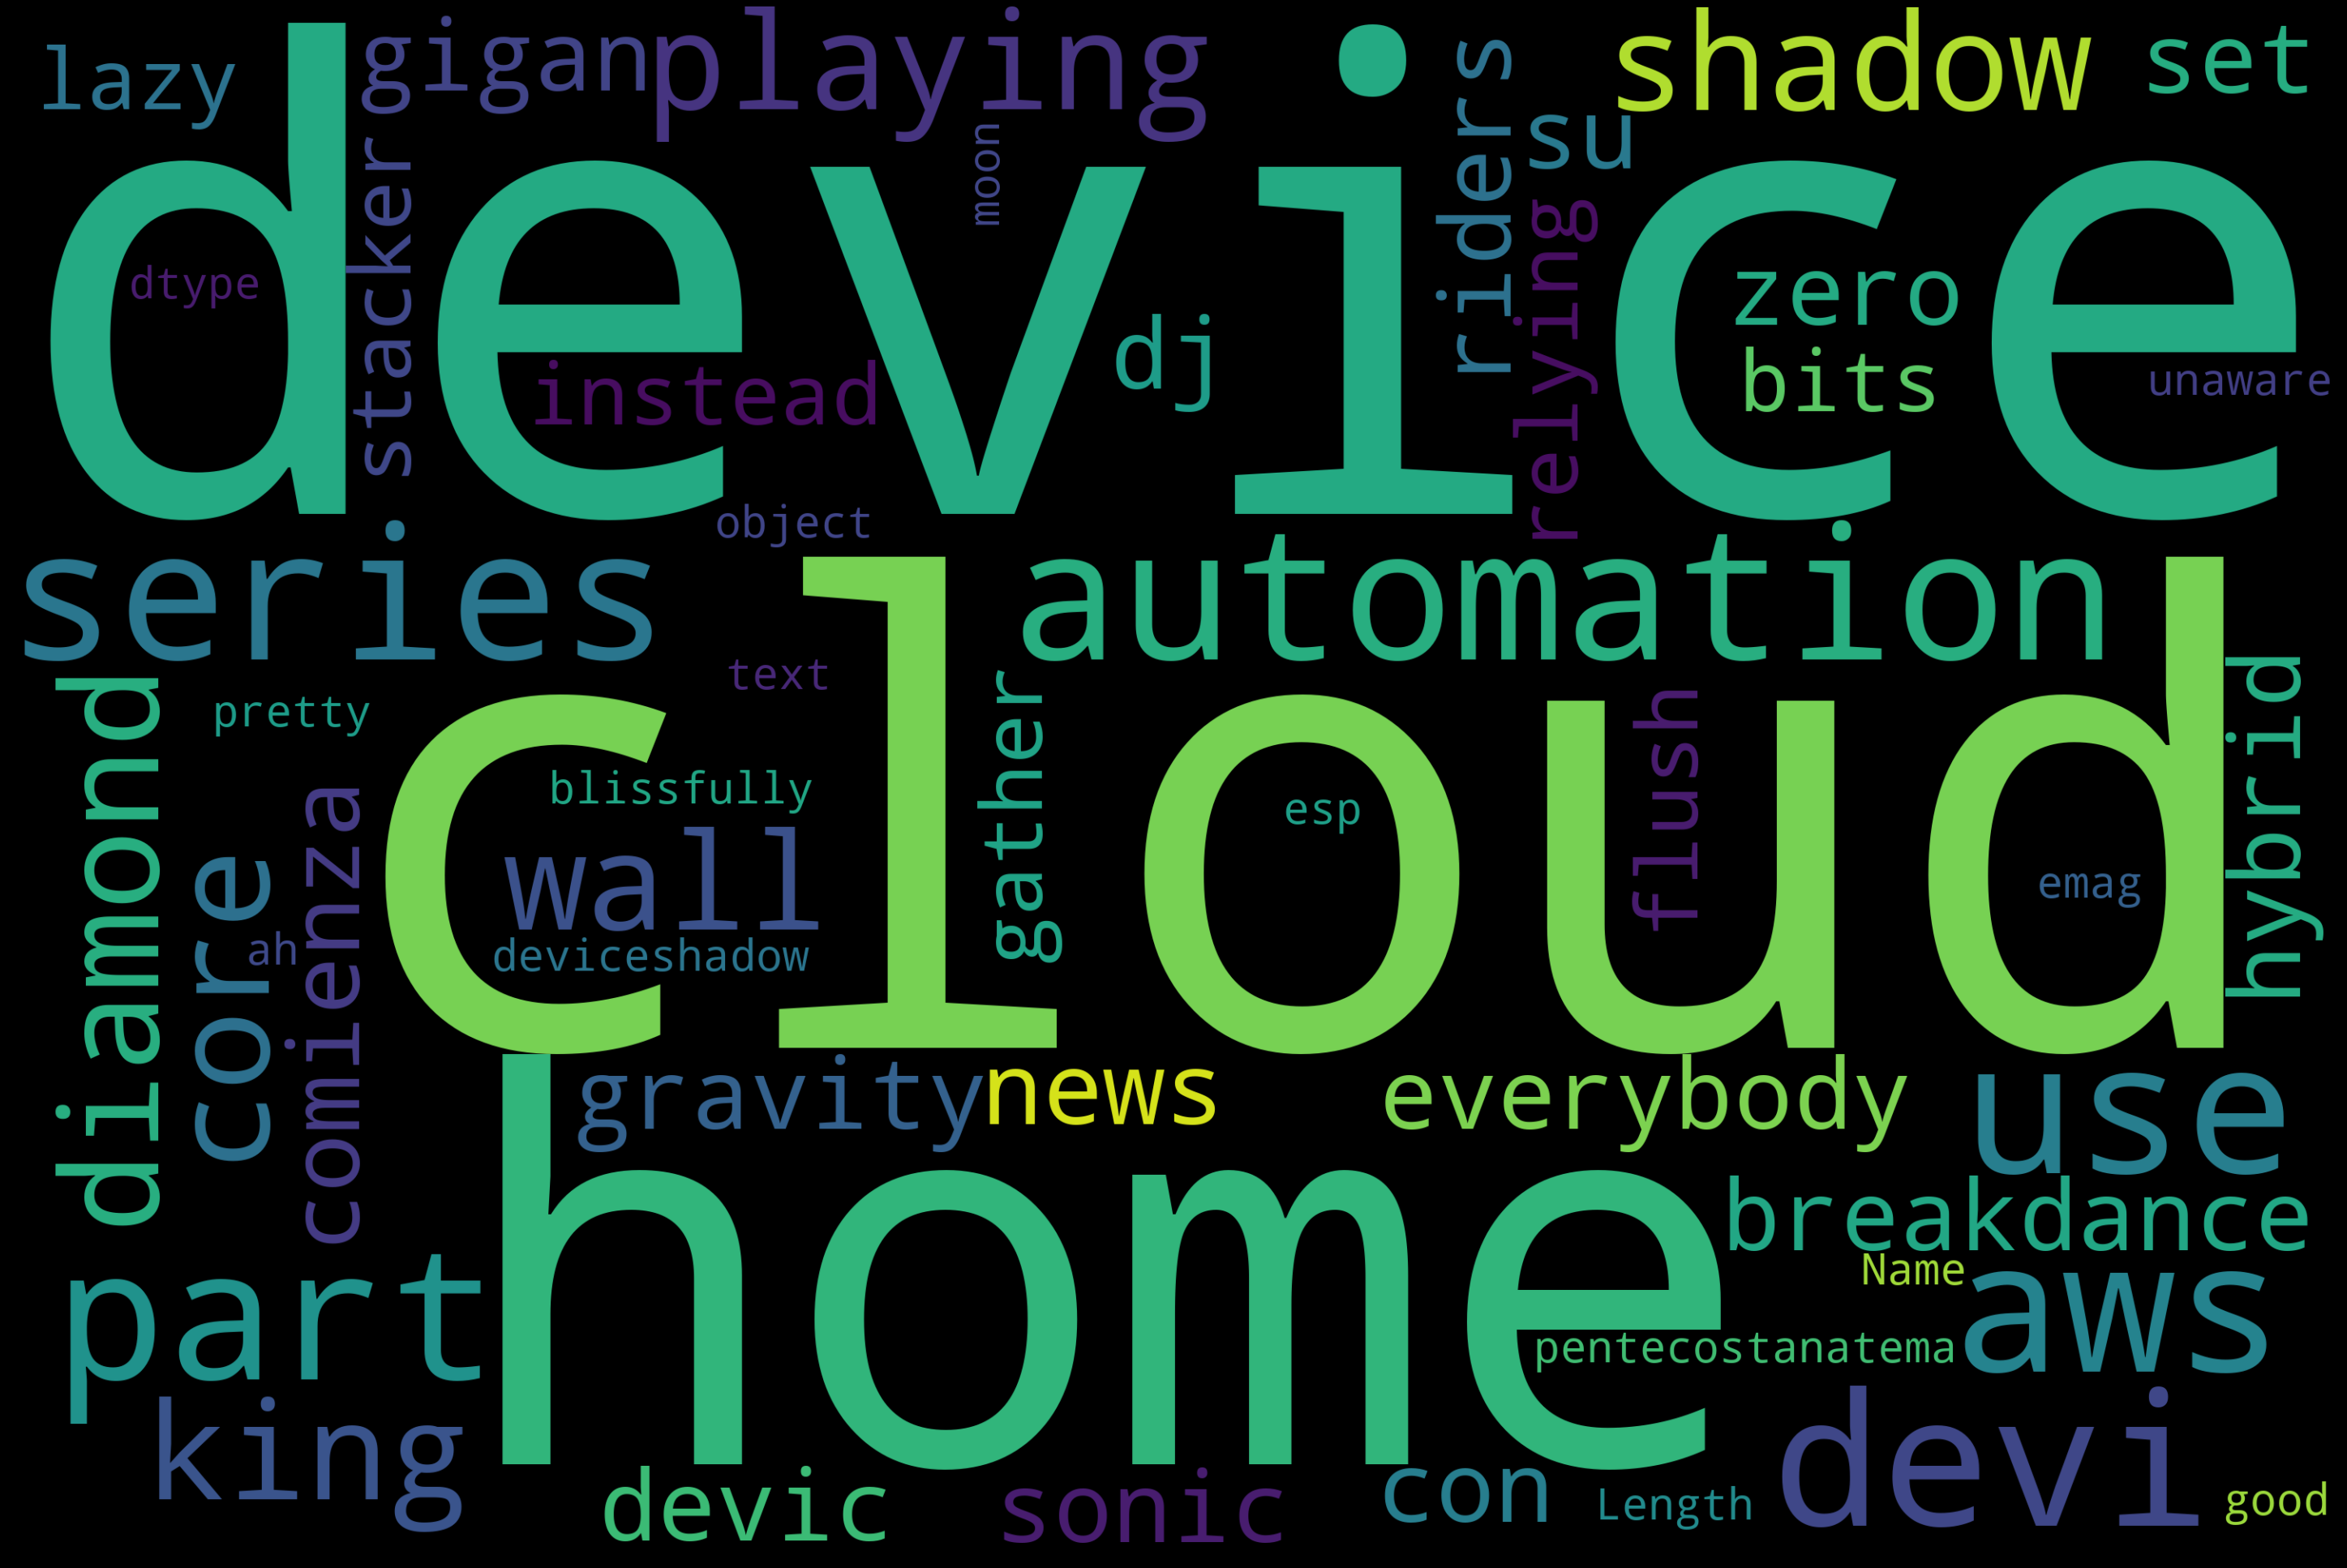

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_clean['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
df_clean['text']

0      news everybody sonic riders zero gravity gigan...
1      dj breakdance comienza su set con hybrid devic...
2      instead relying lazy flush gather bits device ...
0      playing core device shadow wall king diamond a...
1      playing core device shadow wall king diamond a...
                             ...                        
186    cloud home automation series part use aws devi...
187    cloud home automation series part use aws devi...
188    cloud home automation series part use aws devi...
189           stacker pentecostanatema deviceshadow moon
190    ah emag pretty good blissfully unaware esp com...
Name: text, Length: 362, dtype: object

In [42]:
documents = df_clean['text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Richtofen"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Data Analysis is a trend for amp"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 aws
 iot
 refactored
 version
 embedded
 json
 available
 sdk
 libraries
 mqtt
Cluster 1:
 device
 shadow
 shadows
 iot
 aws
 devices
 amazon
 use
 service
 new
Cluster 2:
 esp32
 home
 series
 automation
 control
 acting
 address
 synchronization
 designed
 challenges
Cluster 3:
 mobile
 speaker
 steve
 using
 amplify
 smith
 practice
 lead
 bluetooth
 portable


Prediction
[1]
[1]
